In [92]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io, color
from skimage import img_as_float
import numpy as np

In [64]:
#Setup functions
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap = 'inferno')
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

def plot_beautiful_img(img, img2 = [], vector = False, size = (360,360,3)):
    if vector:
        img = create_u_byte_image_from_vector(img, *size)

    if not len(img2):


        fig, ax = plt.subplots(nrows=1, figsize = (8,4))
        ax.imshow(img)
        ax.axis('off')
    else:
        if vector:
            img2 = create_u_byte_image_from_vector(img2, *size)

        fig, ax = plt.subplots(ncols=2, figsize = (16,8))
        ax[0].imshow(img)
        ax[1].imshow(img2)
        ax[1].axis('off')
        ax[0].axis('off')
    plt.tight_layout()
    plt.show()

def degree_to_radians(x):
    return x * math.pi/180.


In [21]:
#Load img
im_org = io.imread('data/NusaPenida.png')

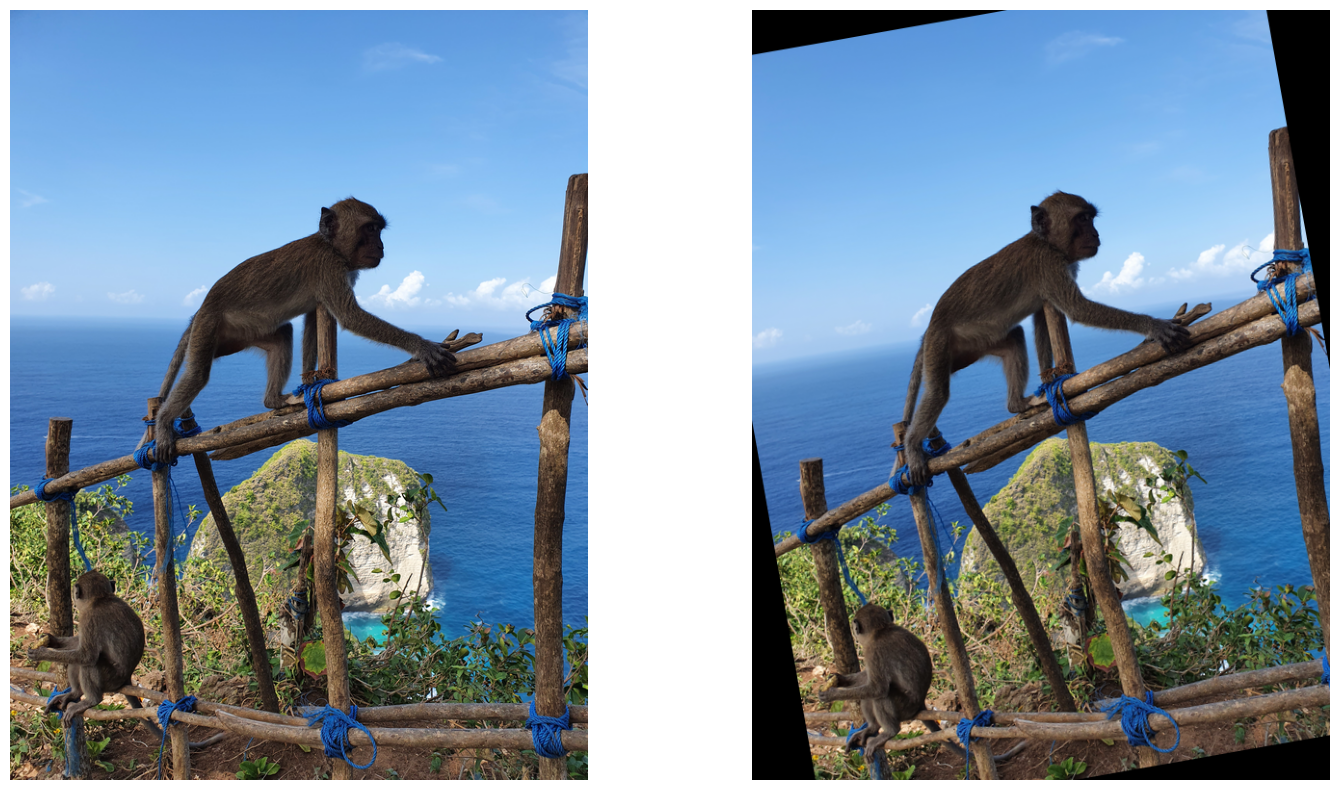

In [30]:
#Ex1 rotate a little
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle) #NOTE this is in degrees (from the center of the image
#show_comparison(im_org, rotated_img, "Rotated image")
plot_beautiful_img(im_org, rotated_img)

In [41]:
#Can also be rotated around a specified point
rot_center = [0,0]
rotated_img = rotate(im_org, rotation_angle, rot_center, mode = 'wrap') #without mode it gets black boarders
#options for mode are ['constant', 'edge', 'wrap', 'reflect', 'symmetric']
plot_beautiful_img(im_org, rotated_img)

In [46]:
#Trying out following line
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=0) #cval (constant value) in [0,1]. Determines the intensity of the constant value
plot_beautiful_img(im_org, rotated_img)

In [49]:
rotated_img = rotate(im_org, rotation_angle, resize=True) #resize makes the conors visable again
plot_beautiful_img(im_org, rotated_img)

In [53]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


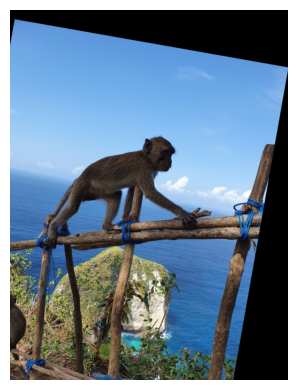

In [59]:
#with the rotation matrix calculated above, the org image can be rotated
transformed_img = warp(im_org, tform) #accually transforms the image inversed of the matrix. One can use tform.inverse to get the real one
transformed_img = warp(im_org, tform.inverse)
#Notice that the image has been moved (traslatation)
plot_beautiful_img(transformed_img)

In [72]:
#Making a tranformation only using rotation
transform_matrix = EuclideanTransform(rotation = degree_to_radians(320))
transformed_img = warp(im_org, transform_matrix.inverse)
plot_beautiful_img(transformed_img)

In [103]:
simtransform = SimilarityTransform(scale = 0.6, rotation=degree_to_radians(15), translation= (40,30))
transformed_img = warp(im_org, simtransform.inverse)
plot_beautiful_img(im_org, transformed_img)

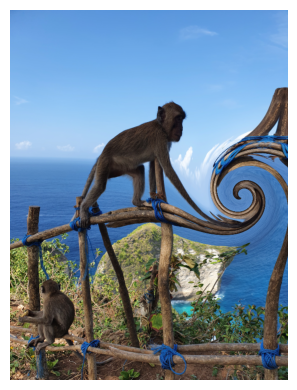

In [104]:
#Introducing the swirl
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center = c) #the swirl point can be moved
plot_beautiful_img(swirl_img)

In [93]:
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

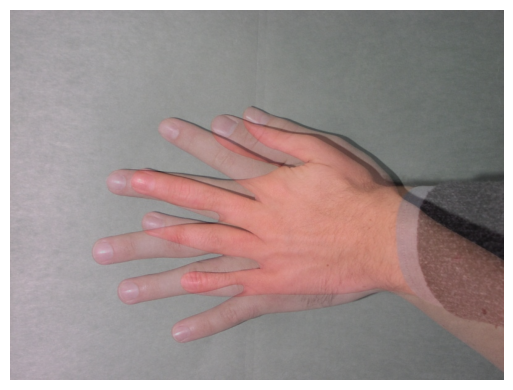

In [100]:
#landmark based registration
#Starting of by just blending them together
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
plot_beautiful_img(blend)

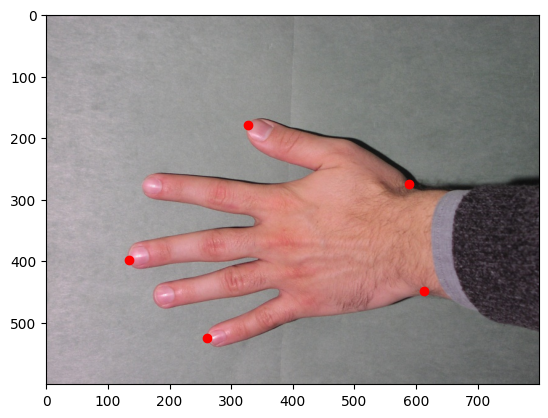

In [105]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

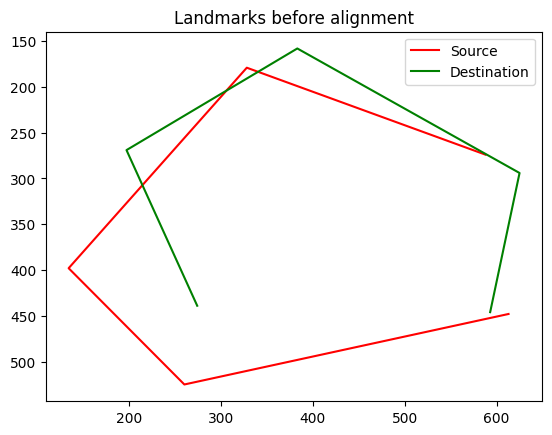

In [110]:
dst = np.array([[274, 439], [197, 269], [383, 158], [625, 294], [593, 446]])
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [ ]:
tform = EuclideanTransform()
tform.estimate(src, dst)

src_transform = matrix_transform(src, tform.params)